# Run the whole deltas algorithm

In [20]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [21]:
N1 = 10000
N2 = 10
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-5, -5],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

original


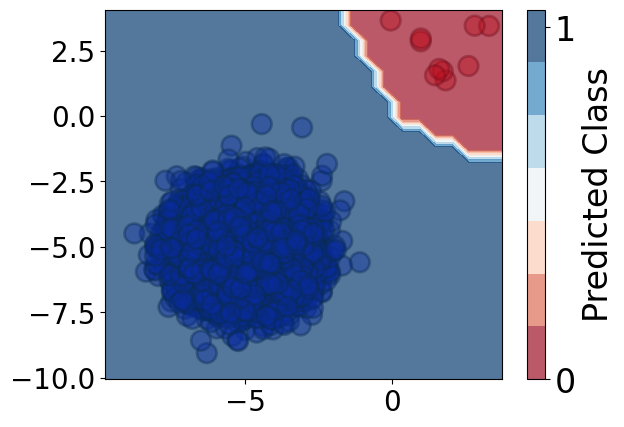

SMOTE


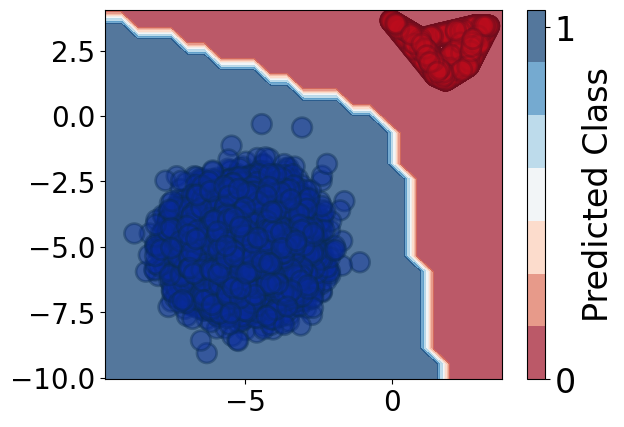

balanced_weights


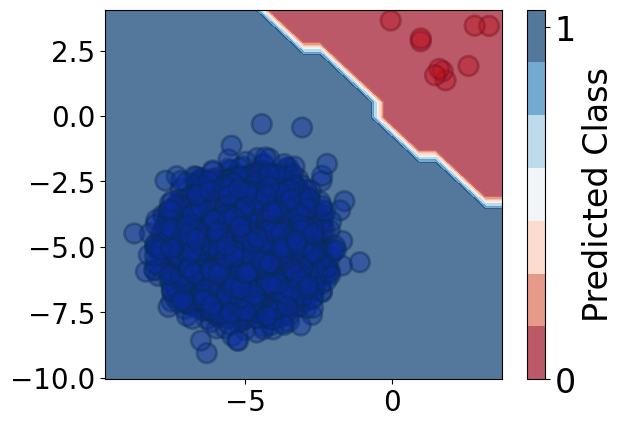

Bayes Minimum Risk


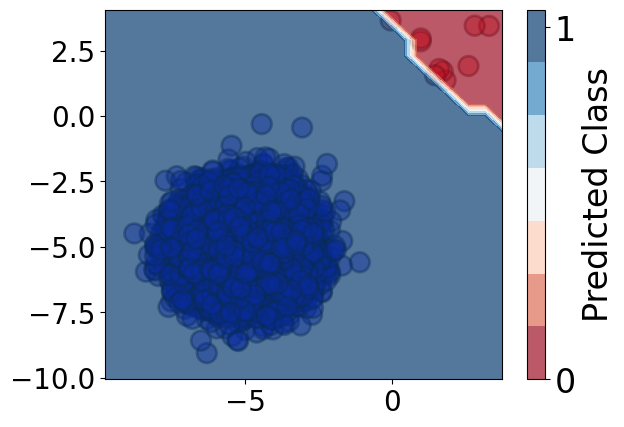

Bayes Minimum Risk (Not calibrated)


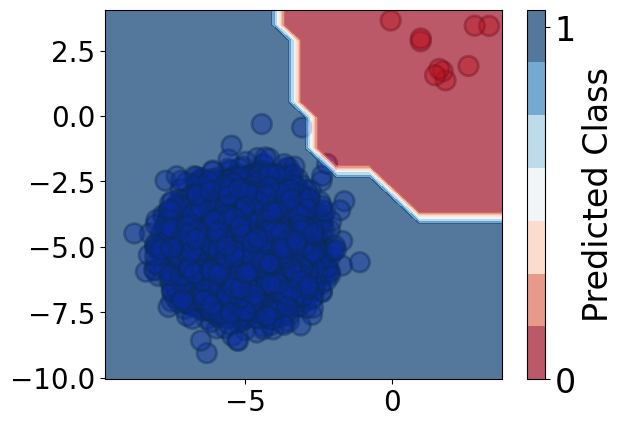

Thresholding


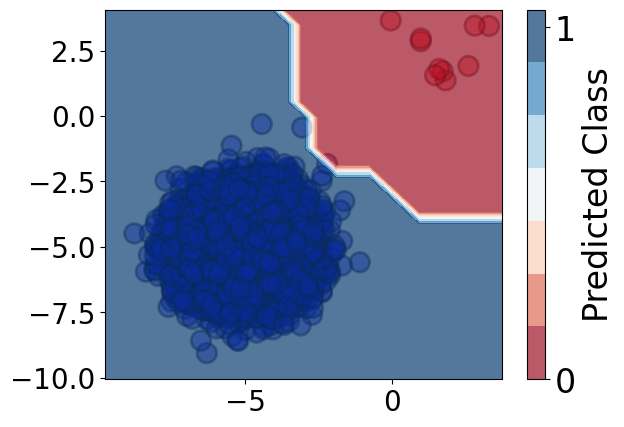

In [32]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
model = 'MLP'

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)
data_clf['clf'] = classifiers_dict['original']                    

## Fit deltas

deltas init: [0.999999999999999, 2.5479321652493136e-08]
eq. 7 can be satisfied: True
Grid Search Optimisation Complete
    delta1 : 0.0001 
    delta2: 3.2812381358763124e-07
    constraint satisfied: True


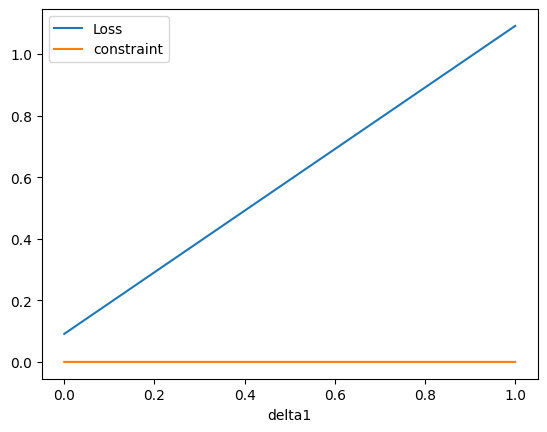

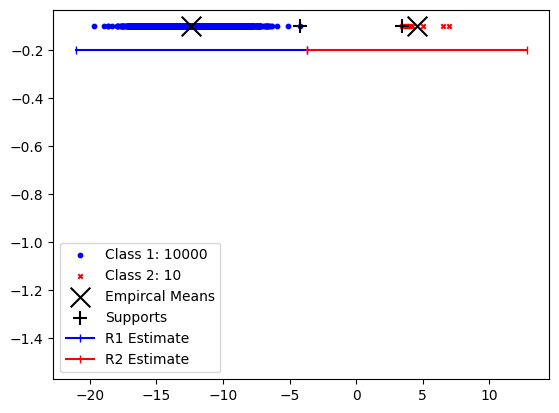

In [23]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = downsample.downsample_deltas(
#     clf).fit(X, y, _print=True, _plot=True, max_trials=10000)
deltas_model = base.base_deltas(
    clf).fit(X, y, grid_search=True, _print=True, _plot=True)

## Plot training data information

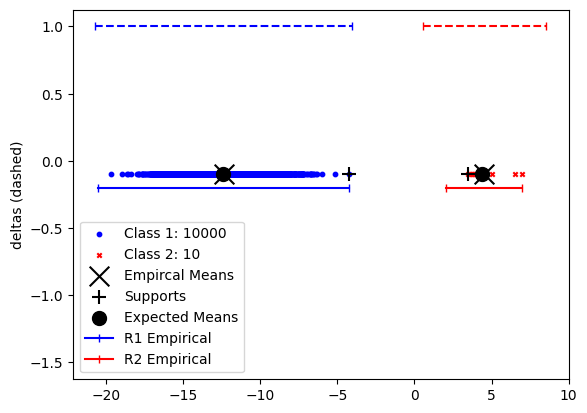

In [24]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [25]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [26]:
deltas_model.print_params()

Parameters
                R:  19.698751580072773
                N1: 10000
                N2: 10
                R1: 8.147495255642916
                R2: 2.461691724904645
                M:  7.698355327268404
                D:  16.932529259835327
                C1: 1
                C2: 1


# Evaluation on test data

                                     accuracy    G-Mean  ROC-AUC  \
Method                                                             
original                              0.99615  0.996143  0.99615   
SMOTE                                 0.99985  0.999850  0.99985   
balanced_weights                      0.99965  0.999650  0.99965   
Bayes Minimum Risk                    0.87580  0.866949  0.87580   
Bayes Minimum Risk (Not calibrated)   1.00000  1.000000  1.00000   
Thresholding                          1.00000  1.000000  1.00000   
deltas                                1.00000  1.000000  1.00000   

                                     precision1 (red)  precision2 (blue)  \
Method                                                                     
original                                     0.992359                1.0   
SMOTE                                        0.999700                1.0   
balanced_weights                             0.999300                1.0   
Bayes M

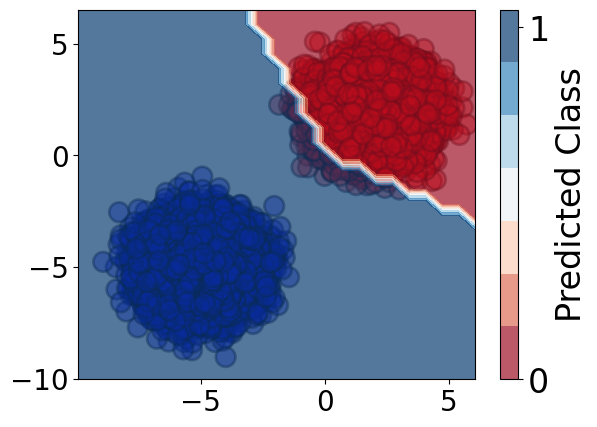

SMOTE


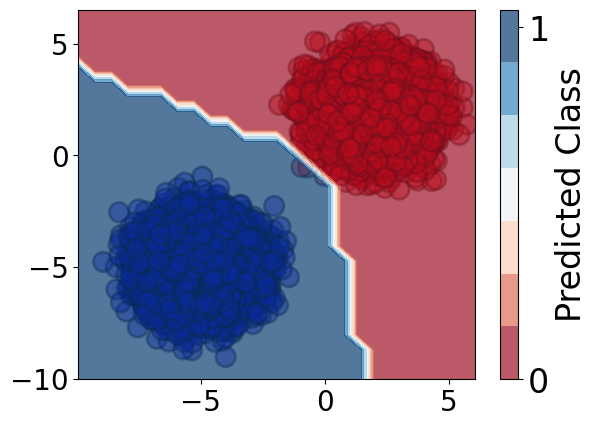

balanced_weights


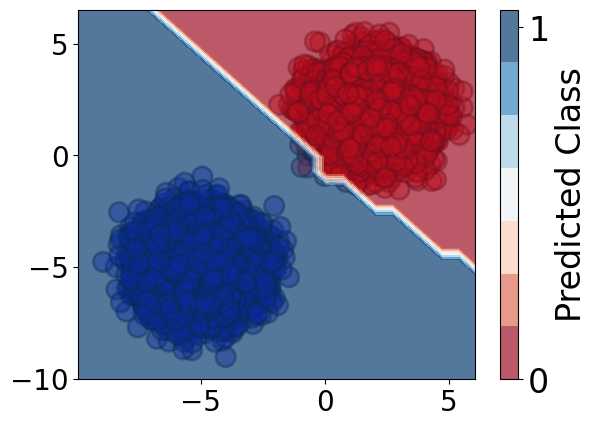

Bayes Minimum Risk


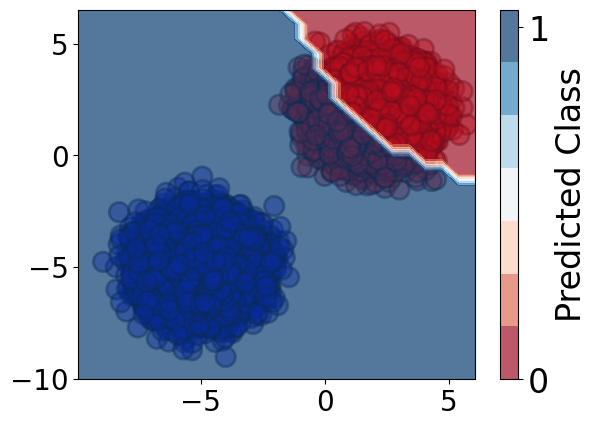

Bayes Minimum Risk (Not calibrated)


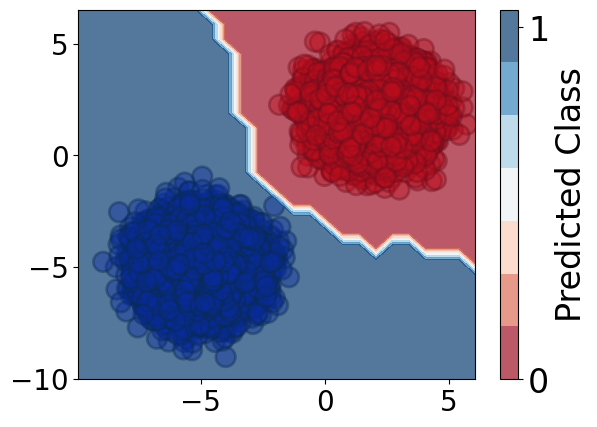

Thresholding


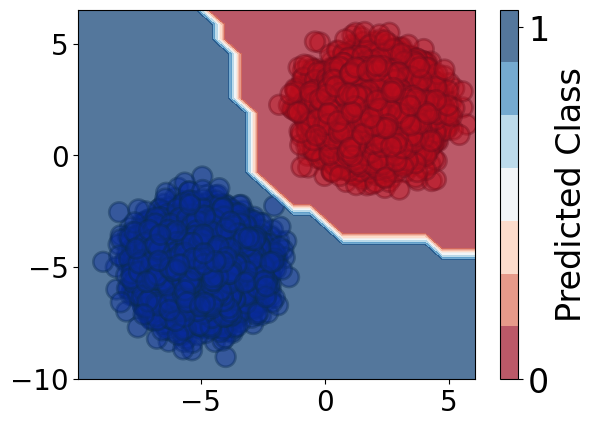

deltas


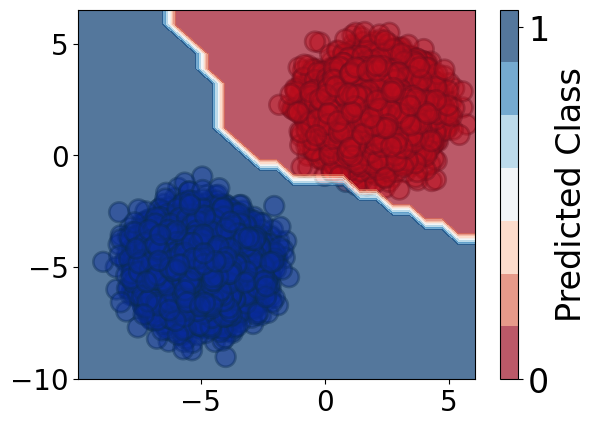

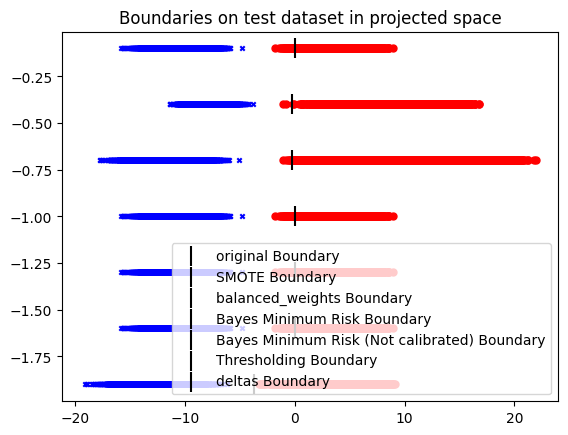

LATEX table format


\begin{tabular}{lrrrrrrrrl}
\toprule
 & accuracy & G-Mean & ROC-AUC & precision1 (red) & precision2 (blue) & precision & recall & F1 & F-score-1 \\
Method &  &  &  &  &  &  &  &  &  \\
\midrule
original & 0.996150 & 0.996143 & 0.996150 & 0.992359 & 1.000000 & 0.992359 & 1.000000 & 0.996135 & [0.99616477 0.99613512] \\
SMOTE & 0.999850 & 0.999850 & 0.999850 & 0.999700 & 1.000000 & 0.999700 & 1.000000 & 0.999850 & [0.99985002 0.99984998] \\
balanced_weights & 0.999650 & 0.999650 & 0.999650 & 0.999300 & 1.000000 & 0.999300 & 1.000000 & 0.999650 & [0.99965012 0.99964988] \\
Bayes Minimum Risk & 0.875800 & 0.866949 & 0.875800 & 0.801025 & 1.000000 & 0.801025 & 1.000000 & 0.858187 & [0.88952144 0.8581868 ] \\
Bayes Minimum Risk (Not calibrated) & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
Thresholding & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
deltas & 1.0000

,accuracy,G-Mean,ROC-AUC,precision1 (red),precision2 (blue),precision,recall,F1,F-score-1
Method,,,,,,,,,
original,0.99615,0.996143,0.99615,0.992359,1.0,0.992359,1.0,0.996135,"[0.996164765652239, 0.9961351202128194]"
SMOTE,0.99985,0.999850,0.99985,0.999700,1.0,0.999700,1.0,0.999850,"[0.9998500224966256, 0.9998499774966245]"
balanced_weights,0.99965,0.999650,0.99965,0.999300,1.0,0.999300,1.0,0.999650,"[0.99965012245714, 0.99964987745711]"
Bayes Minimum Risk,0.87580,0.866949,0.87580,0.801025,1.0,0.801025,1.0,0.858187,"[0.8895214374666429, 0.8581868006394154]"
Bayes Minimum Risk (Not calibrated),1.00000,1.000000,1.00000,1.000000,1.0,1.000000,1.0,1.000000,"[1.0, 1.0]"
Thresholding,1.00000,1.000000,1.00000,1.000000,1.0,1.000000,1.0,1.000000,"[1.0, 1.0]"
deltas,1.00000,1.000000,1.00000,1.000000,1.0,1.000000,1.0,1.000000,"[1.0, 1.0]"


In [40]:
classifiers_dict['deltas'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)